In [1]:

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

In [2]:
#connecting to google drive so as to access image
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
from keras.metrics.metrics import BinaryAccuracy


train_data_dir = '/content/gdrive/MyDrive/80_20/80_20/train'

validation_data_dir = '/content/gdrive/MyDrive/80_20/80_20/val'
test_data_dir='/content/gdrive/MyDrive/80_20/80_20/test'


model = Sequential()

model.add(Conv2D(32, (5,5) ,input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.8))

model.add(Dense(1))
model.add(Activation('relu'))

#model.compile(loss='binary_crossentropy',
 #             optimizer='rmsprop',
  #            metrics=['accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()])



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 252, 252, 32)      2432      
                                                                 
 activation_5 (Activation)   (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 32)      25632     
                                                                 
 activation_6 (Activation)   (None, 122, 122, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                  

In [12]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
   # batch_size=batch_size,
    class_mode='binary'
    )

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(256, 256),
    #batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    #batch_size=batch_size,
    class_mode='binary')
  #  validation_steps=nb_validation_samples // batch_size)
X=train_generator



Found 4215 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.
Found 625 images belonging to 2 classes.


In [13]:
history=model.fit(X, validation_data=validation_generator, epochs= 5,)

Epoch 1/5
132/132 [==============================] - 964s 7s/step - loss: 0.4818 - binary_accuracy: 0.7034 - val_loss: 0.3195 - val_binary_accuracy: 0.8854
Epoch 2/5
132/132 [==============================] - 63s 475ms/step - loss: 0.3362 - binary_accuracy: 0.8842 - val_loss: 0.2790 - val_binary_accuracy: 0.9083
Epoch 3/5
132/132 [==============================] - 63s 478ms/step - loss: 0.3187 - binary_accuracy: 0.8961 - val_loss: 0.2724 - val_binary_accuracy: 0.9217
Epoch 4/5
132/132 [==============================] - 65s 491ms/step - loss: 0.3181 - binary_accuracy: 0.8930 - val_loss: 0.3235 - val_binary_accuracy: 0.9054
Epoch 5/5
132/132 [==============================] - 62s 473ms/step - loss: 0.3097 - binary_accuracy: 0.8973 - val_loss: 0.2979 - val_binary_accuracy: 0.8997


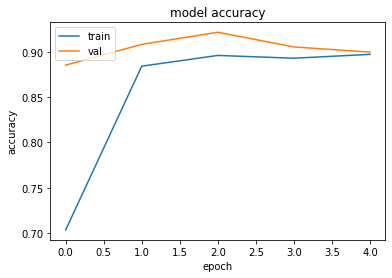

In [14]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

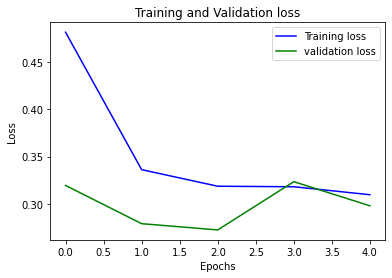

In [15]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,5)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
labels=test_datagen
y_true = labels# ground truth labels
y_probas = model.predict(test_generator)# predicted probabilities generated by sklearn classifier
sklearn.metrics.roc_curve(y_true, y_probas)
plt.show()

20/20 [==============================] - 412s 22s/step


ValueError: ignored